### This notebook will cover the process of One-Hot Encoding the sequences associated with each transcript, building/training a deep learning model, and building/training a gradient boosting model

### In this section, we will one-hot encode the sequences to prepare them to be used as input for the models

In [89]:
# load the dataset
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/ML_FinalProject/final_expression_with_sequences.csv')
df.head()

,Name,Description,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,transcript_id_x,transcript_id_y,sequence
0,ENSG00000227232.5,WASH7P,-0.123846,-0.013572,-0.002610,-0.008449,-0.000559,-0.008659,-0.001629,0.001415,0.002948,0.000726,ENST00000488147,ENSG00000227232::1:24386-25386(-),AACCCGTGTGTGCACATTTTTTGTGCTTTTCCAGAACTGTGTACCA...
1,ENSG00000233750.3,CICP27,-0.127444,-0.014391,-0.002761,-0.008784,-0.001466,-0.009513,-0.002162,0.001299,0.003319,0.000545,ENST00000442987,ENSG00000233750::1:130525-131525(+),GTCAAAAGTTAAAGAAACTTTGCAGGTCAGGACAGAATCGAATAAT...
2,ENSG00000268903.1,ENSG00000268903,0.073242,-0.012280,-0.001378,0.065349,0.011552,0.034967,-0.050337,-0.033125,-0.027376,0.001724,ENST00000494149,ENSG00000268903::1:135395-136395(-),TCACACCGGCCCCTCCCACGCTGAGAGAGGTCAGTGTGAGCCCTTG...
3,ENSG00000269981.1,ENSG00000269981,0.197083,-0.010883,0.000580,0.087887,-0.012004,0.052083,-0.053531,-0.069170,-0.050675,-0.023379,ENST00000595919,ENSG00000269981::1:137465-138465(-),CAAATCAGGCTTTTGCCCAACTTCTGTCTACTGTCGGACTCTACAG...
4,ENSG00000279928.2,DDX11L17,-0.128000,-0.014400,-0.002366,-0.009148,-0.001414,-0.009585,-0.001641,0.001489,0.003598,0.000606,ENST00000624431,ENSG00000279928::1:182196-183196(+),CCCTGGAGATTCTTATTAGTGATTTGGGCTGGGGCCTGGCCATGTG...


In [90]:
# define a function to remove "N" characters from the sequences
def clean_sequence(sequence, valid_chars="ACGT"):
    invalid_chars = [char for char in sequence if char not in valid_chars]
    if invalid_chars:
        print(f"Invalid characters found: {set(invalid_chars)}")
    return ''.join([char for char in sequence if char in valid_chars])

In [91]:
df["cleaned_seqs"] = df["sequence"].apply(clean_sequence)
df.head()

Invalid characters found: {'N'}
Invalid characters found: {'N'}
Invalid characters found: {'N'}
Invalid characters found: {'N'}


,Name,Description,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,transcript_id_x,transcript_id_y,sequence,cleaned_seqs
0,ENSG00000227232.5,WASH7P,-0.123846,-0.013572,-0.002610,-0.008449,-0.000559,-0.008659,-0.001629,0.001415,0.002948,0.000726,ENST00000488147,ENSG00000227232::1:24386-25386(-),AACCCGTGTGTGCACATTTTTTGTGCTTTTCCAGAACTGTGTACCA...,AACCCGTGTGTGCACATTTTTTGTGCTTTTCCAGAACTGTGTACCA...
1,ENSG00000233750.3,CICP27,-0.127444,-0.014391,-0.002761,-0.008784,-0.001466,-0.009513,-0.002162,0.001299,0.003319,0.000545,ENST00000442987,ENSG00000233750::1:130525-131525(+),GTCAAAAGTTAAAGAAACTTTGCAGGTCAGGACAGAATCGAATAAT...,GTCAAAAGTTAAAGAAACTTTGCAGGTCAGGACAGAATCGAATAAT...
2,ENSG00000268903.1,ENSG00000268903,0.073242,-0.012280,-0.001378,0.065349,0.011552,0.034967,-0.050337,-0.033125,-0.027376,0.001724,ENST00000494149,ENSG00000268903::1:135395-136395(-),TCACACCGGCCCCTCCCACGCTGAGAGAGGTCAGTGTGAGCCCTTG...,TCACACCGGCCCCTCCCACGCTGAGAGAGGTCAGTGTGAGCCCTTG...
3,ENSG00000269981.1,ENSG00000269981,0.197083,-0.010883,0.000580,0.087887,-0.012004,0.052083,-0.053531,-0.069170,-0.050675,-0.023379,ENST00000595919,ENSG00000269981::1:137465-138465(-),CAAATCAGGCTTTTGCCCAACTTCTGTCTACTGTCGGACTCTACAG...,CAAATCAGGCTTTTGCCCAACTTCTGTCTACTGTCGGACTCTACAG...
4,ENSG00000279928.2,DDX11L17,-0.128000,-0.014400,-0.002366,-0.009148,-0.001414,-0.009585,-0.001641,0.001489,0.003598,0.000606,ENST00000624431,ENSG00000279928::1:182196-183196(+),CCCTGGAGATTCTTATTAGTGATTTGGGCTGGGGCCTGGCCATGTG...,CCCTGGAGATTCTTATTAGTGATTTGGGCTGGGGCCTGGCCATGTG...


In [118]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# prepare the data for one-hot encoding
flatten_seqs = [[char for char in seq] for seq in df["cleaned_seqs"]]

# initialize the one-hot encoder
encoder = OneHotEncoder(categories=[list("AGTC")])

# perform one-hot encoding on the sequences
encoded_seqs = [encoder.fit_transform(np.array(chars).reshape(-1, 1)) for chars in flatten_seqs]

# add the encoded seqs to the df
df["one_hot_encoded"] = encoded_seqs

In [130]:
df.loc[df.index[0], "one_hot_encoded"]

<1000x4 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [124]:
df["one_hot_encoded"][0]

<1000x4 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [6]:
# Convert sparse matrices to arrays
df["one_hot_encoded"] = df["one_hot_encoded"].apply(lambda x: x.toarray())

# Check the first array
print(df["one_hot_encoded"].iloc[0])

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [7]:
print(df["one_hot_encoded"].iloc[0].shape)

(1000, 4)


In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Extract the one-hot encoded sequences as a list of arrays
sequences = df["one_hot_encoded"].tolist()

# Set the max sequence length
max_length = 1000

# Pad all sequences to the same length
padded_sequences = pad_sequences(
    sequences, maxlen=max_length, padding="post", dtype="float32"
)

# Convert to a 3D NumPy array
sequences = np.array(padded_sequences)

print(f"Shape of the padded sequences: {sequences.shape}")

Shape of the padded sequences: (22114, 1000, 4)


In [9]:
# add the one-hot encoded sequences and full sequences to the gene expression matrix
expression_data = y = pd.read_csv("/content/drive/MyDrive/ML_FinalProject/filtered_gene_expression_data.csv")
expression_data = y[y["Name"].isin(df["Name"])]
expression_data["sequence"] = df["sequence"]
expression_data.head()

<ipython-input-9-8222f4badc0c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expression_data["sequence"] = df["sequence"]


,Name,Description,GTEX-1RLM8-0005-SM-DO121,GTEX-1192X-0005-SM-5NQC3,GTEX-1117F-0005-SM-HL9SH,GTEX-145MG-0005-SM-HK78V,GTEX-13SLW-0005-SM-HK78Q,GTEX-1JMPZ-0006-SM-DHXJ9,GTEX-1JJE9-0006-SM-CGQEB,GTEX-11ZU8-0005-SM-5PNU5,...,GTEX-1H3O1-0005-SM-ACKV8,GTEX-14PII-0005-SM-7RHFV,GTEX-14C39-0005-SM-5NQBR,GTEX-1H23P-0005-SM-A9G14,GTEX-WOFL-0006-SM-3TW8K,GTEX-1HR9M-0005-SM-AHZ26,GTEX-1H1CY-0005-SM-A9G15,GTEX-18D9B-0005-SM-7PBYL,GTEX-13QJC-0006-SM-HKZYR,sequence
0,ENSG00000227232.5,WASH7P,0.324956,0.432168,1.333430,1.650170,0.335150,1.23969,0.940392,0.683171,...,2.001880,1.262540,1.281070,1.545860,1.230230,1.253740,3.062120,2.33337,1.370700,AACCCGTGTGTGCACATTTTTTGTGCTTTTCCAGAACTGTGTACCA...
1,ENSG00000233750.3,CICP27,0.076708,0.047365,0.037888,0.067821,0.182128,0.00000,0.043072,0.078618,...,0.273034,0.344394,0.786257,0.302085,0.251016,0.199409,0.221103,1.54443,0.724205,GTCAAAAGTTAAAGAAACTTTGCAGGTCAGGACAGAATCGAATAAT...
2,ENSG00000268903.1,ENSG00000268903,4.001050,7.655870,32.054000,18.037300,26.920900,6.40244,37.575100,54.194700,...,30.673500,87.053100,101.907000,84.496500,83.241400,83.961300,53.037100,150.73100,73.830800,TCACACCGGCCCCTCCCACGCTGAGAGAGGTCAGTGTGAGCCCTTG...
3,ENSG00000269981.1,ENSG00000269981,12.039200,16.166700,41.798800,23.837800,41.922100,13.44380,38.132000,65.488200,...,49.716900,177.506000,207.716000,147.571000,133.412000,137.413000,52.557900,246.46000,124.562000,CAAATCAGGCTTTTGCCCAACTTCTGTCTACTGTCGGACTCTACAG...
4,ENSG00000279928.2,DDX11L17,0.058238,0.000000,0.000000,0.137307,0.000000,0.00000,0.425110,0.000000,...,0.207291,0.980503,0.000000,0.067954,0.000000,0.000000,0.503591,0.00000,0.000000,CCCTGGAGATTCTTATTAGTGATTTGGGCTGGGGCCTGGCCATGTG...


### In this section, we will build a Deep learning model that takes the sequence and tissue type as input to predict the gene expression profile

In [2]:
#import pandas as pd
# read in the dataset
#df = pd.read_csv("/content/drive/MyDrive/ML_FinalProject/expression_data_with_sequences.csv")

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert to a NumPy array
X_sequences = np.array(padded_sequences)

print(f"Shape of the X_Sequences: {X_sequences.shape}")

Shape of the X_Sequences: (22114, 1000, 4)


In [11]:
# Identify expression columns
expression_columns = [col for col in expression_data.columns if col.startswith("GTEX")]

# Extract expression data
y = expression_data[expression_columns].values

print(f"y shape: {y.shape}")

y shape: (22114, 100)


In [12]:
# Extract tissue codes for each sample
tissue_codes = [col.split("-")[2] for col in expression_columns]

# One-hot encode tissue types
from sklearn.preprocessing import OneHotEncoder
tissue_encoder = OneHotEncoder(sparse_output=False)
X_tissue = tissue_encoder.fit_transform(np.array(tissue_codes).reshape(-1, 1))

# Repeat tissue types for all genes per sample
X_tissue = np.repeat(X_tissue, X_sequences.shape[0] // len(tissue_codes), axis=0)

print(f"X_tissue shape: {X_tissue.shape}")

X_tissue shape: (22100, 4)


In [13]:
# Find the minimum number of samples
min_samples = min(len(X_tissue), len(encoded_seqs), len(y))

# Truncate all datasets to have the same number of samples
X_tissue = X_tissue[:min_samples]
X_sequences = encoded_seqs[:min_samples]
y = y[:min_samples]

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from scipy.sparse import csr_matrix

# Determine the desired sequence length
max_length = max(len(seq) if isinstance(seq, (list, np.ndarray)) else seq.shape[0] for seq in X_sequences)

# Pad sequences
X_sequences_padded = pad_sequences(
    [seq.toarray() if isinstance(seq, csr_matrix) else seq for seq in X_sequences],
    maxlen=max_length,
    padding='post',
    dtype='float32'
)

# Ensure X_tissue is a NumPy array of consistent type
X_tissue = np.array([seq.toarray() if isinstance(seq, csr_matrix) else seq for seq in X_tissue]).astype("float32")

# Ensure y is a NumPy array of float32
y = np.array(y).astype("float32")

print(f"X_sequences_padded shape: {X_sequences_padded.shape}")
print(f"X_tissue shape: {X_tissue.shape}")
print(f"y shape: {y.shape}")

X_sequences_padded shape: (22100, 1000, 4)
X_tissue shape: (22100, 4)
y shape: (22100, 100)


In [16]:
from sklearn.model_selection import train_test_split

# Split data into train/test sets
X_train_tissue, X_test_tissue, y_train, y_test = train_test_split(
    np.array(X_tissue), np.array(y), test_size=0.2, random_state=42
)
X_train_seq, X_test_seq = train_test_split(
    np.array(X_sequences_padded), test_size=0.2, random_state=42
)

print(f"Train shapes: {X_train_tissue.shape}, {y_train.shape}")
print(f"Test shapes: {X_test_tissue.shape}, {y_test.shape}")

Train shapes: (17680, 4), (17680, 100)
Test shapes: (4420, 4), (4420, 100)


In [56]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Sequence input branch
input_seq = Input(shape=(1000, 4), sparse=True)  # Sequence input for all genes
x_seq = Conv1D(32, kernel_size=15, activation="relu")(input_seq)
x_seq = BatchNormalization()(x_seq)
x_seq = Conv1D(64, kernel_size=7, activation="relu")(x_seq)
x_seq = BatchNormalization()(x_seq)
x_seq = Conv1D(128, kernel_size=3, activation="relu")(x_seq)
x_seq = Flatten()(x_seq)  # Produces a feature vector per gene

# Compress sequence features to match batch size
x_seq = Dense(32, activation="relu")(x_seq)

# Tissue input branch
input_tissue = Input(shape=(4,))  # One-hot encoded tissue input
x_tissue = Dense(32, activation="relu")(input_tissue)

# Combine sequence and tissue features
combined = Concatenate()([x_seq, x_tissue])
x = Dense(128, activation="relu", kernel_regularizer=l2(0.01))(combined)
x = Dropout(0.5)(x)
x = Dense(64, activation="relu", kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)

# Output layer for gene expression predictions
output = Dense(1, activation="linear")(x)

# Define the model
model = Model(inputs=[input_seq, input_tissue], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mae"])

# Display model summary
model.summary()


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_30            │ (None, 1000, 4)        │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_36 (Conv1D)        │ (None, 986, 32)        │          1,952 │ input_layer_30[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_20    │ (None, 986, 32)        │            128 │ conv1d_36[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_37 (Conv1D)        │ (None, 980, 64)        │         14,400 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_21    │ (None, 980, 64)        │            256 │ conv1d_37[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_38 (Conv1D)        │ (None, 978, 128)       │         24,704 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_12 (Flatten)      │ (None, 125184)         │              0 │ conv1d_38[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_31            │ (None, 4)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_74 (Dense)          │ (None, 32)             │      4,005,920 │ flatten_12[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_75 (Dense)          │ (None, 32)             │            160 │ input_layer_31[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_14            │ (None, 64)             │              0 │ dense_74[0][0],        │
│ (Concatenate)             │                        │                │ dense_75[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_76 (Dense)          │ (None, 128)            │          8,320 │ concatenate_14[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_32 (Dropout)      │ (None, 128)            │              0 │ dense_76[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_77 (Dense)          │ (None, 64)             │          8,256 │ dropout_32[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_33 (Dropout)      │ (None, 64)             │              0 │ dense_77[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_78 (Dense)          │ (None, 1)              │             65 │ dropout_33[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 4,064,161 (15.50 MB)

 Trainable params: 4,063,969 (15.50 MB)

 Non-trainable params: 192 (768.00 B)

In [54]:
'''
##############################################

This is the architecture for a simpler model that I used for testing purposes
to see if simplifying the model would improve model performance.

#############################################


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Dense, Concatenate, Dropout, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Sequence input branch
input_seq = Input(shape=(1000, 4))
x_seq = Conv1D(16, kernel_size=15, activation="relu", kernel_regularizer=l2(0.01))(input_seq)
x_seq = GlobalAveragePooling1D()(x_seq)  # Global pooling instead of flattening
x_seq = Dense(8, activation="relu", kernel_regularizer=l2(0.01))(x_seq)  # Reduced neurons

# Tissue input branch
input_tissue = Input(shape=(4,))
x_tissue = Dense(8, activation="relu", kernel_regularizer=l2(0.01))(input_tissue)  # Further reduced neurons

# Combine sequence and tissue features
combined = Concatenate()([x_seq, x_tissue])
x = Dense(32, activation="relu", kernel_regularizer=l2(0.01))(combined)  # Halve neurons
x = Dropout(0.4)(x)  # Lower dropout
x = Dense(16, activation="relu", kernel_regularizer=l2(0.01))(x)
x = Dropout(0.4)(x)
output = Dense(1, activation="linear")(x)

# Define the model
model = Model(inputs=[input_seq, input_tissue], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss="mse", metrics=["mae"])

model.summary()

'''

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_28            │ (None, 1000, 4)        │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_35 (Conv1D)        │ (None, 986, 16)        │            976 │ input_layer_28[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 16)             │              0 │ conv1d_35[0][0]        │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_29            │ (None, 4)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_69 (Dense)          │ (None, 8)              │            136 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_70 (Dense)          │ (None, 8)              │             40 │ input_layer_29[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_13            │ (None, 16)             │              0 │ dense_69[0][0],        │
│ (Concatenate)             │                        │                │ dense_70[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_71 (Dense)          │ (None, 32)             │            544 │ concatenate_13[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_30 (Dropout)      │ (None, 32)             │              0 │ dense_71[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_72 (Dense)          │ (None, 16)             │            528 │ dropout_30[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_31 (Dropout)      │ (None, 16)             │              0 │ dense_72[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_73 (Dense)          │ (None, 1)              │             17 │ dropout_31[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Train the model
history = model.fit(
    [X_train_seq, X_train_tissue],
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 61408.5430 - mae: 16.3407 - val_loss: 6251142.0000 - val_mae: 61.2793
Epoch 2/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 296627.4688 - mae: 26.7512 - val_loss: 6251153.5000 - val_mae: 61.6244
Epoch 3/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 128812.7109 - mae: 21.8032 - val_loss: 6251182.5000 - val_mae: 61.6198
Epoch 4/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 101748.0234 - mae: 20.0073 - val_loss: 6250850.0000 - val_mae: 64.8010
Epoch 5/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 207265.6250 - mae: 26.5989 - val_loss: 6251116.5000 - val_mae: 62.3855
Epoch 6/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 76846.4922 - mae: 22.6189 - val_loss: 6250864.5000 - val_mae: 64.2403
Epoch 7/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 413569.3750 - mae: 33.0940 - val_loss: 6251063.0000 - val_mae: 62.5575
Epoch 8/50
442/442 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 142659.2500 - ma

In [61]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=3)  # 3-fold cross-validation

for train_index, val_index in kf.split(X_train_seq):
    # Split the data
    X_train_seq_fold = X_train_seq[train_index]
    X_val_seq_fold = X_train_seq[val_index]
    X_train_tissue_fold = X_train_tissue[train_index]
    X_val_tissue_fold = X_train_tissue[val_index]
    y_train_fold = y_train[train_index]
    y_val_fold = y_train[val_index]

    # Train the model on the current fold
    history = model.fit(
        [X_train_seq_fold, X_train_tissue_fold],
        y_train_fold,
        validation_data=([X_val_seq_fold, X_val_tissue_fold], y_val_fold),
        epochs=20,
        batch_size=32,
        verbose=1
    )

Epoch 1/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 2754917.0000 - mae: 43.7051 - val_loss: 203029.3281 - val_mae: 30.7705
Epoch 2/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1314090.6250 - mae: 37.5410 - val_loss: 203025.1094 - val_mae: 30.2525
Epoch 3/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 720573.6250 - mae: 31.2461 - val_loss: 203031.0625 - val_mae: 31.2783
Epoch 4/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 943333.7500 - mae: 34.3181 - val_loss: 203039.1875 - val_mae: 32.1953
Epoch 5/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 229875.6250 - mae: 28.8829 - val_loss: 203028.8906 - val_mae: 30.9612
Epoch 6/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 80042.1719 - mae: 28.2422 - val_loss: 203025.2500 - val_mae: 30.1008
Epoch 7/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 238172.5312 - mae: 27.3733 - val_loss: 203030.5156 - val_mae: 31.1344
Epoch 8/20
369/369 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1036448.5000 - mae: 3

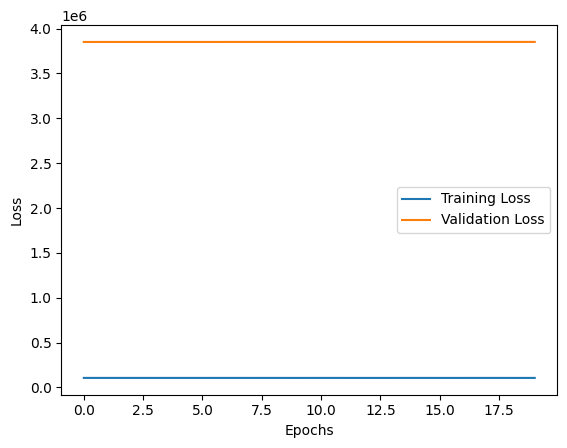

In [62]:
import matplotlib.pyplot as plt

# Plot loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [63]:
# Evaluate the model
test_loss, test_mae = model.evaluate([X_test_seq, X_test_tissue], y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 72634512.0000 - mae: 162.5559
Test Loss: 57726364.0, Test MAE: 135.6893768310547


In [66]:
y_pred = model.predict([X_test_seq, X_test_tissue])
print(f"Predicted expression shape: {y_pred.shape}")

139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Predicted expression shape: (4420, 1)


In [67]:
from joblib import dump

dump(model, '/content/drive/MyDrive/ML_FinalProject/deep_learning_model.pkl')

['/content/drive/MyDrive/ML_FinalProject/deep_learning_model.pkl']

### In this section, we will build a Gradient Boosting Model using XGBoost. The purpose of this model is to predict the expression levels of a DNA sequence across the samples based on the input sequence and tissue type

In [82]:
import numpy as np

# Flatten sequence features
X_train_seq_flat = X_train_seq.reshape(X_train_seq.shape[0], -1)

# Combine sequence and tissue features
X_train_combined = np.hstack([X_train_seq_flat, X_train_tissue])

# Flatten sequence features
X_test_seq_flat = X_test_seq.reshape(X_test_seq.shape[0], -1)

# Combine sequence and tissue features
X_test_combined = np.hstack([X_test_seq_flat, X_test_tissue])

In [69]:
print(f"X_train_combined shape: {X_train_combined.shape}")
print(f"y_train shape: {y_train.shape}")

X_train_combined shape: (17680, 4004)
y_train shape: (17680, 100)


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train_split, y_val = train_test_split(
    X_train_combined, y_train, test_size=0.2, random_state=42
)

print(f"Training set shape: {X_train.shape}, {y_train_split.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")

Training set shape: (14144, 4004), (14144, 100)
Validation set shape: (3536, 4004), (3536, 100)


In [81]:
from xgboost import XGBRegressor

# Define the XGBoost model with GPU acceleration
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective="reg:squarederror",
    tree_method="hist",  # Use histogram-based tree construction
    device="cuda",       # Enable GPU acceleration
    random_state=42
)

# Fit the model
xgb_model.fit(X_train_combined, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [96]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    objective="reg:squarederror",
    tree_method="hist",  # Use histogram-based tree construction
    device="cuda",       # Enable GPU acceleration
    random_state=42
)

# get a smaller subset of the data so training goes faster
X_train_subset, _, y_train_subset, _ = train_test_split(X_train_combined, y_train, test_size=0.8, random_state=42)

# Define hyperparameter search space
param_distributions = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=5,
    scoring="neg_mean_squared_error",
    cv=2,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on a smaller subset of data for faster training
random_search.fit(X_train_subset, y_train_subset)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best Score: -516908.560546875


In [97]:
# Retrieve the best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Best Score: -516908.560546875


In [99]:
# Access and save the best model
best_model = random_search.best_estimator_
joblib.dump(best_model, "/content/drive/MyDrive/ML_FinalProject/best_xgb_model.pkl")

['/content/drive/MyDrive/ML_FinalProject/best_xgb_model.pkl']

In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test set
y_test_pred = best_model.predict(X_test_combined)

# Calculate metrics
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Display metrics
print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R^2: {r2:.4f}")

Test MSE: 57726220.0000
Test MAE: 196.2489
Test R^2: -0.0002


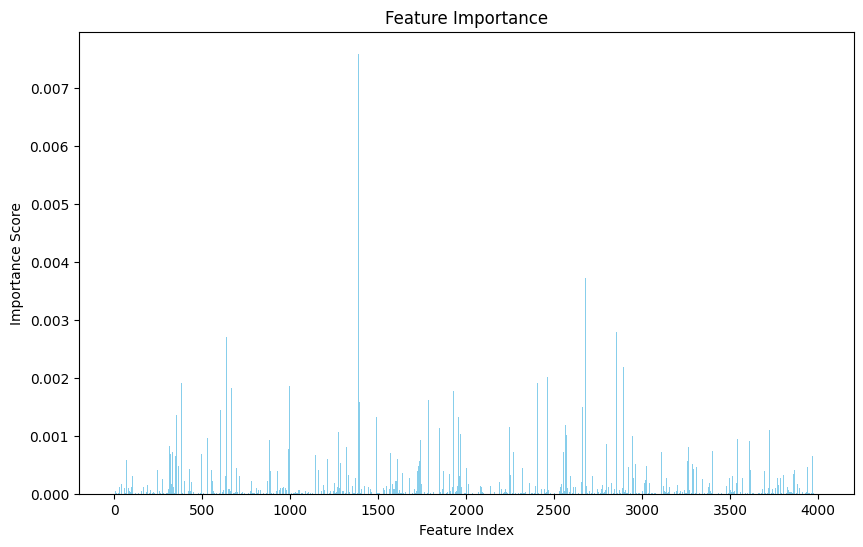

In [108]:
import matplotlib.pyplot as plt

# Access feature importances
feature_importance = best_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, color='skyblue')
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.title("Feature Importance")
plt.show()

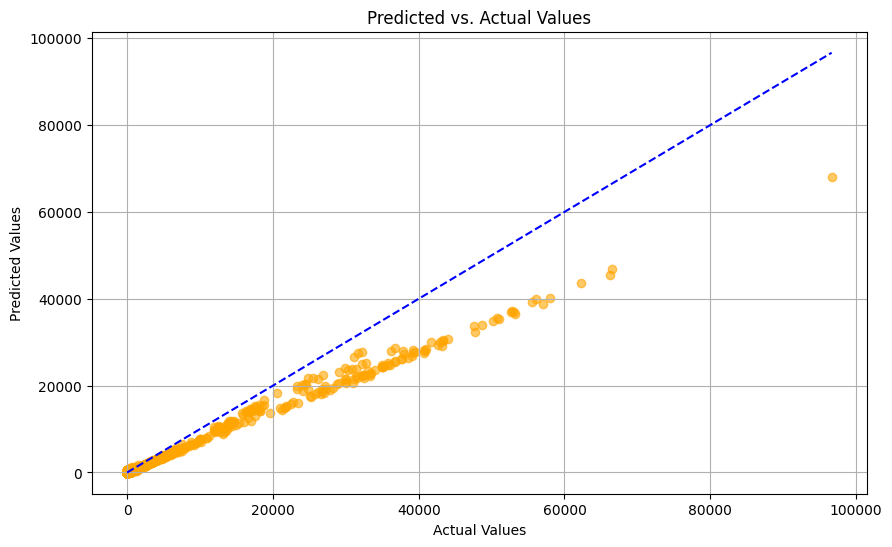

In [115]:
import numpy as np

y_train_subset = np.array(y_train_subset)

# Plot predicted vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_train_subset, y_pred, alpha=0.6, color="orange")
plt.plot([y_train_subset.min(), y_train_subset.max()],
         [y_train_subset.min(), y_train_subset.max()],
         color="blue", linestyle="--")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.grid()
plt.show()